<a href="https://colab.research.google.com/github/MHusni1604/Pengantar-Anlisis-Data-Panel/blob/main/Tugas_Minggu_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 2

## Library


In [9]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.4 MB/s eta 0:00:00


In [16]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Load Data

In [3]:
df = pd.read_excel("https://github.com/MHusni1604/Pengantar-Anlisis-Data-Panel/raw/main/Dataset/Panel%20Dataset.xlsx")
df.head()

,Provinsi,Tahun,Prevalensi Balita Gizi Kurang (0-59 Bulan),PDRB,Imunisasi Dasar,Presentasi Miskin,Rata Lama Pendidikan
0,ACEH,2016,14.11,136843.82,38.15,16.73,9.36
1,ACEH,2017,18.90,145806.92,23.19,16.89,9.42
2,ACEH,2018,16.80,155910.98,18.32,15.97,9.46
3,SUMATERA UTARA,2016,10.08,626062.91,47.08,10.35,9.46
4,SUMATERA UTARA,2017,13.10,684634.43,27.10,10.22,9.55


In [4]:
df.set_index(['Provinsi ', 'Tahun'], inplace=True)
df.head()

Prevalensi Balita Gizi Kurang (0-59 Bulan)       PDRB  \
Provinsi       Tahun                                                          
ACEH           2016                                        14.11  136843.82   
               2017                                        18.90  145806.92   
               2018                                        16.80  155910.98   
SUMATERA UTARA 2016                                        10.08  626062.91   
               2017                                        13.10  684634.43   

                      Imunisasi Dasar  Presentasi Miskin  Rata Lama Pendidikan  
Provinsi       Tahun                                                            
ACEH           2016             38.15              16.73                  9.36  
               2017             23.19              16.89                  9.42  
               2018             18.32              15.97                  9.46  
SUMATERA UTARA 2016             47.08              10.35                  9.46  
               2017             27.10              10.22                  9.55

## Statistik Deskriptif

<Figure size 1000x600 with 0 Axes>

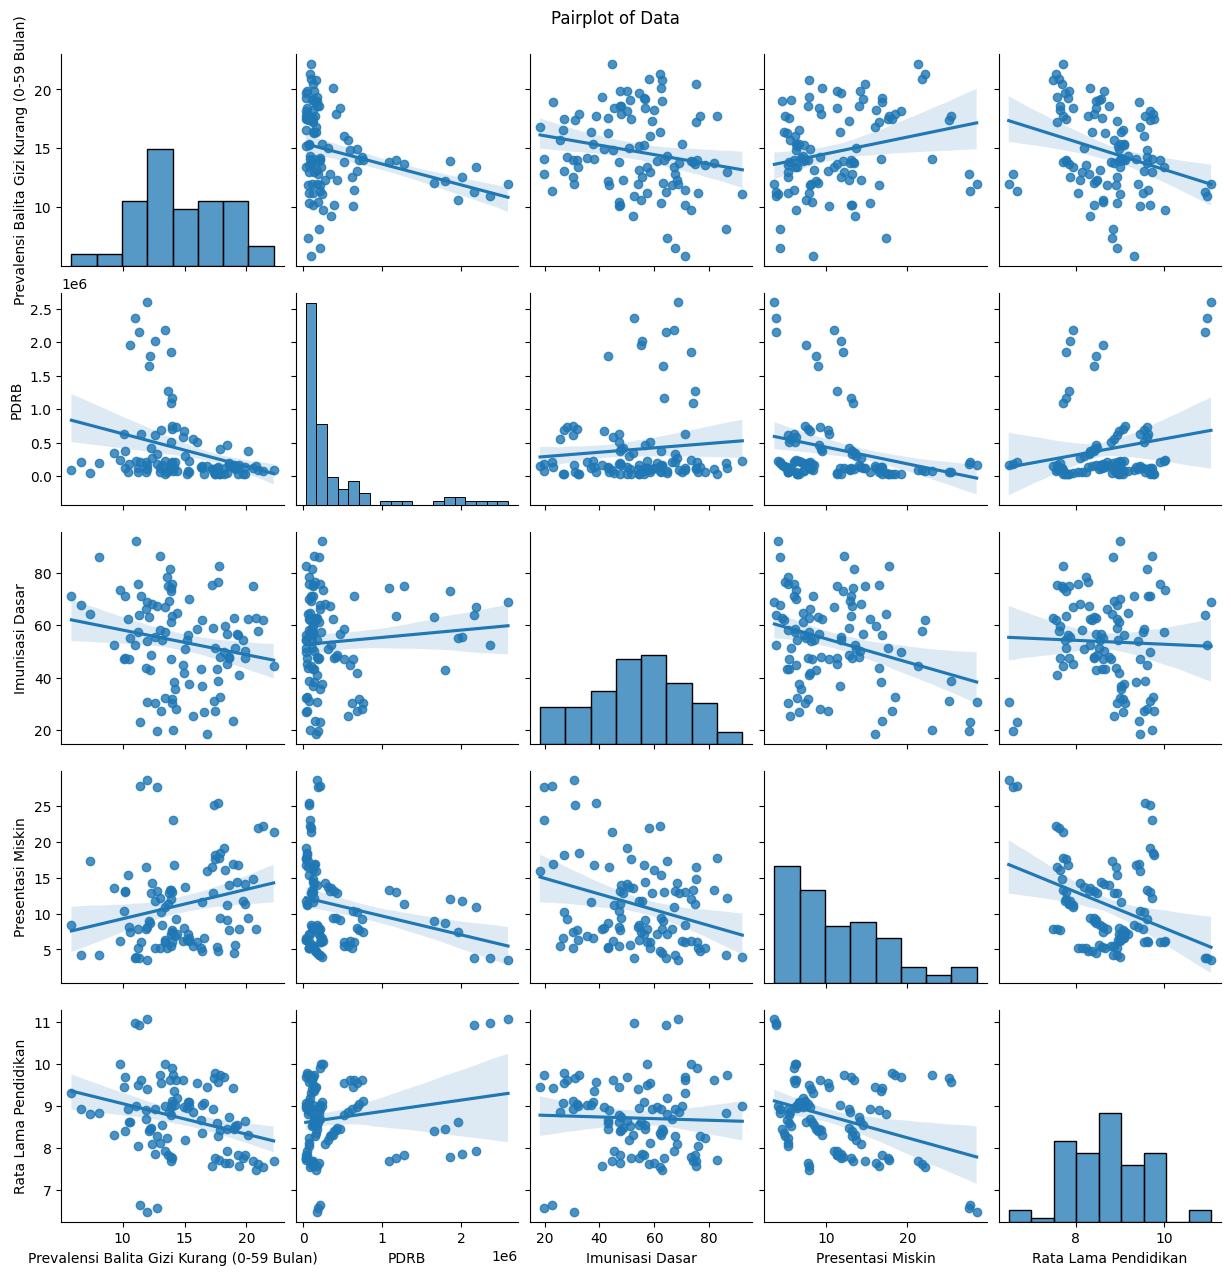

In [5]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, kind='reg')
plt.suptitle('Pairplot of Data', y=1.02)
plt.show()

In [6]:
df.describe(include='all')

,Prevalensi Balita Gizi Kurang (0-59 Bulan),PDRB,Imunisasi Dasar,Presentasi Miskin,Rata Lama Pendidikan
count,102.000000,1.020000e+02,102.000000,102.000000,102.000000
mean,14.726961,4.053376e+05,53.710392,11.210882,8.713824
std,3.489348,5.791373e+05,16.939769,5.947272,0.866379
min,5.860000,2.915060e+04,18.320000,3.570000,6.480000
25%,12.225000,9.231789e+04,43.180000,6.335000,8.107500
50%,14.050000,1.691676e+05,54.765000,9.390000,8.765000
75%,17.697500,4.184412e+05,65.972500,14.252500,9.347500
max,22.200000,2.592607e+06,92.100000,28.540000,11.060000


## Analisis Regresi Data Panel Fixed Effect Model

In [7]:
X = df[['PDRB', 'Imunisasi Dasar', 'Presentasi Miskin', 'Rata Lama Pendidikan',]]
y = df['Prevalensi Balita Gizi Kurang (0-59 Bulan)']

### Model Efek Dua Arah

In [11]:
X = sm.add_constant(X)
model = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = model.fit()
print(results)

                                      PanelOLS Estimation Summary                                       
Dep. Variable:     Prevalensi Balita Gizi Kurang (0-59 Bulan)   R-squared:                        0.0464
Estimator:                                           PanelOLS   R-squared (Between):             -15.581
No. Observations:                                         102   R-squared (Within):              -0.3045
Date:                                        Thu, Apr 03 2025   R-squared (Overall):             -13.558
Time:                                                12:43:28   Log-likelihood                   -165.63
Cov. Estimator:                                    Unadjusted                                           
                                                                F-statistic:                      0.7541
Entities:                                                  34   P-value                           0.5591
Avg Obs:                                               

### Model Efek Unit

In [12]:
model = PanelOLS(y, X, entity_effects=True)
results = model.fit()
print(results)

                                      PanelOLS Estimation Summary                                       
Dep. Variable:     Prevalensi Balita Gizi Kurang (0-59 Bulan)   R-squared:                        0.0354
Estimator:                                           PanelOLS   R-squared (Between):             -0.7991
No. Observations:                                         102   R-squared (Within):               0.0354
Date:                                        Thu, Apr 03 2025   R-squared (Overall):             -0.6886
Time:                                                13:45:39   Log-likelihood                   -166.75
Cov. Estimator:                                    Unadjusted                                           
                                                                F-statistic:                      0.5880
Entities:                                                  34   P-value                           0.6725
Avg Obs:                                               

### Model Efek Waktu

In [13]:
model = PanelOLS(y, X, time_effects=True)
results = model.fit()
print(results)

                                      PanelOLS Estimation Summary                                       
Dep. Variable:     Prevalensi Balita Gizi Kurang (0-59 Bulan)   R-squared:                        0.1793
Estimator:                                           PanelOLS   R-squared (Between):              0.2056
No. Observations:                                         102   R-squared (Within):               0.0095
Date:                                        Thu, Apr 03 2025   R-squared (Overall):              0.1796
Time:                                                13:45:43   Log-likelihood                   -261.55
Cov. Estimator:                                    Unadjusted                                           
                                                                F-statistic:                      5.1896
Entities:                                                  34   P-value                           0.0008
Avg Obs:                                               

## Uji Asumsi Model Terbaik (Model Efek Waktu)

Normality p-value: 0.0923931819585984


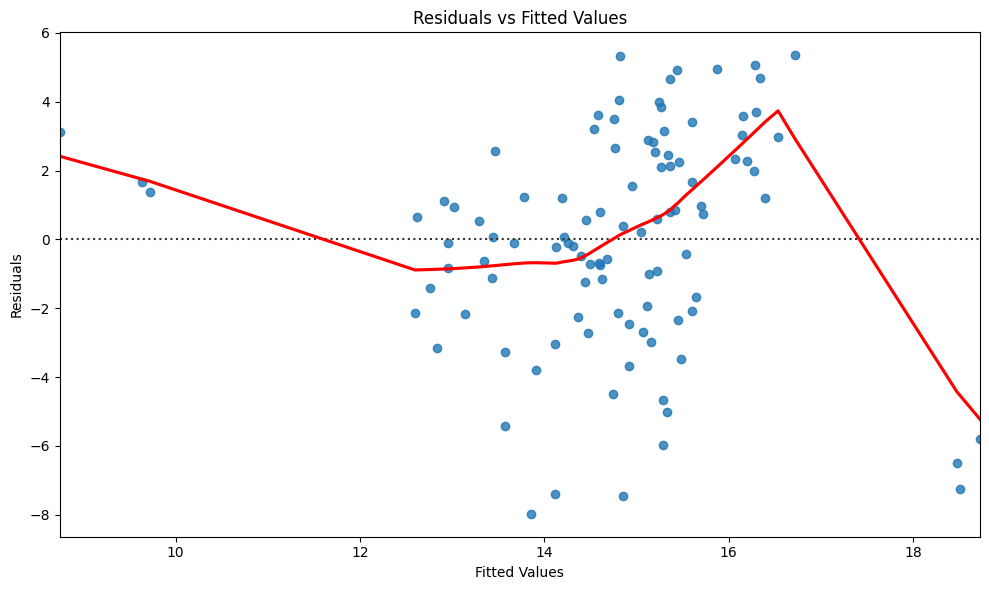

In [33]:
# Normalitas Residual
plt.figure(figsize=(10, 6))
sns.residplot(x=results.fitted_values, y=results.resids, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.tight_layout()

normality_pval = normal_ad(results.resids)[1]
print(f"Normality p-value: {normality_pval}")

In [29]:
# Homokedastisitas (Breusch-Pagan Test)
bp_test = het_breuschpagan(results.resids, results.model.exog.dataframe.values)  # Access the underlying dataframe and then its values
bp_pval = bp_test[1]
print(f"Breusch-Pagan p-value: {bp_pval}")

Breusch-Pagan p-value: 0.0013373839875748868


In [30]:
# Autocorrelation (Durbin-Watson test)
dw_stat = durbin_watson(results.resids)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 0.6194629357293538


In [31]:
# Multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                feature         VIF
0                 const  176.217719
1                  PDRB    1.080741
2       Imunisasi Dasar    1.143682
3     Presentasi Miskin    1.362729
4  Rata Lama Pendidikan    1.202381
